# Results visualization
## imports

In [2]:
from pathlib import Path

import numpy as np
from scipy.stats import wilcoxon, false_discovery_control
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load results and sanity check

In [3]:
# Combination of columns that should lead to a unique result within each file
unique_cols = ['pretrain_dataset', 'finetune_dataset', 'finetune_scheme', 'finetune_subject',
               'finetune_fold', 'directory', 'ref_channel']

In [4]:
results_all = []
for path in Path('.').glob('results*/*.csv'):
    df = pd.read_csv(path)
    df['path'] = str(path)
    df['file'] = path.name
    df['directory'] = path.parent.name
    df = df.groupby(unique_cols, dropna=False).first().reset_index()
    results_all.append(df)

results_all = pd.concat(results_all)

In [5]:
results_all

,pretrain_dataset,finetune_dataset,finetune_scheme,finetune_subject,finetune_fold,directory,ref_channel,pretrain_dur,finetune_phase1_dur,finetune_phase2_dur,...,test_size,seed,pretrain_train_acc,pretrain_valid_acc,finetune_phase1_train_acc,finetune_phase1_valid_acc,finetune_phase2_valid_acc,test_acc,path,file
0,BNCI2014_001,Schirrmeister2017,Scheme 1,8,0,results_v0-1,average,50.338649,0.684618,0.209419,...,160,0,0.543939,0.500963,0.677083,0.740458,0.740458,0.65000,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-8.csv
1,BNCI2014_001,Schirrmeister2017,Scheme 1,8,0,results_v0-1,NaN,38.459759,0.595866,0.205068,...,160,0,0.505195,0.460501,0.500000,0.458015,0.473282,0.38125,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-8.csv
2,BNCI2014_001,Schirrmeister2017,Scheme 1,8,1,results_v0-1,average,50.338649,3.736437,1.792514,...,160,1,0.543939,0.500963,0.785417,0.656489,0.793893,0.72500,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-8.csv
3,BNCI2014_001,Schirrmeister2017,Scheme 1,8,1,results_v0-1,NaN,38.459759,4.125435,2.843621,...,160,1,0.505195,0.460501,0.622917,0.458015,0.610687,0.34375,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-8.csv
4,BNCI2014_001,Schirrmeister2017,Scheme 1,8,2,results_v0-1,average,50.338649,0.973701,0.627491,...,160,2,0.543939,0.500963,0.731250,0.679389,0.725191,0.65000,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-8.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,BNCI2014_001,Schirrmeister2017,Scheme 3,12,1,results_v2,NaN,38.459759,32.604828,5.074470,...,160,1,0.505195,0.460501,0.821212,0.653409,0.835227,0.68125,results_v2/pre-BNCI2014_001_fin-Schirrmeister2...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-12.csv
8,BNCI2014_001,Schirrmeister2017,Scheme 3,12,2,results_v2,NaN,38.459759,19.851492,9.291909,...,160,2,0.505195,0.460501,0.822727,0.642045,0.829545,0.70000,results_v2/pre-BNCI2014_001_fin-Schirrmeister2...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-12.csv
9,BNCI2014_001,Schirrmeister2017,Scheme 4,12,0,results_v2,NaN,38.459759,27.920300,1.994510,...,160,0,0.505195,0.460501,0.928788,0.823864,0.914773,0.78750,results_v2/pre-BNCI2014_001_fin-Schirrmeister2...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-12.csv
10,BNCI2014_001,Schirrmeister2017,Scheme 4,12,1,results_v2,NaN,38.459759,26.972337,1.918001,...,160,1,0.505195,0.460501,0.924242,0.835227,0.943182,0.79375,results_v2/pre-BNCI2014_001_fin-Schirrmeister2...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-12.csv


In [6]:
# Filter results
conditions = dict(
    ref_channel=None,
    # ref_channel='average',
    # directory='results_v2',
    directory='results_v0-1',
)

results = results_all.copy()
for k, v in conditions.items():
    if v is not None:
        mask = results[k] == v
    else:
        mask = results[k].isna()
    results = results[mask]

results

,pretrain_dataset,finetune_dataset,finetune_scheme,finetune_subject,finetune_fold,directory,ref_channel,pretrain_dur,finetune_phase1_dur,finetune_phase2_dur,...,test_size,seed,pretrain_train_acc,pretrain_valid_acc,finetune_phase1_train_acc,finetune_phase1_valid_acc,finetune_phase2_valid_acc,test_acc,path,file
1,BNCI2014_001,Schirrmeister2017,Scheme 1,8,0,results_v0-1,NaN,38.459759,0.595866,0.205068,...,160,0,0.505195,0.460501,0.500000,0.458015,0.473282,0.38125,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-8.csv
3,BNCI2014_001,Schirrmeister2017,Scheme 1,8,1,results_v0-1,NaN,38.459759,4.125435,2.843621,...,160,1,0.505195,0.460501,0.622917,0.458015,0.610687,0.34375,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-8.csv
5,BNCI2014_001,Schirrmeister2017,Scheme 1,8,2,results_v0-1,NaN,38.459759,0.748193,0.685473,...,160,2,0.505195,0.460501,0.533333,0.419847,0.496183,0.41250,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-8.csv
7,BNCI2014_001,Schirrmeister2017,Scheme 1,8,3,results_v0-1,NaN,38.459759,0.165159,0.035121,...,160,3,0.505195,0.460501,0.368750,0.511450,0.511450,0.38125,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-8.csv
9,BNCI2014_001,Schirrmeister2017,Scheme 1,8,4,results_v0-1,NaN,38.459759,2.531078,2.194521,...,160,4,0.505195,0.460501,0.610417,0.442748,0.625954,0.35625,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-8.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,BNCI2014_001,Schirrmeister2017,Scheme 4,12,15,results_v0-1,NaN,38.459759,22.591941,2.348470,...,160,15,0.505195,0.460501,0.890909,0.829545,0.926136,0.81875,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-12.csv
96,BNCI2014_001,Schirrmeister2017,Scheme 4,12,16,results_v0-1,NaN,38.459759,10.997515,0.834382,...,160,16,0.505195,0.460501,0.850000,0.840909,0.875000,0.77500,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-12.csv
97,BNCI2014_001,Schirrmeister2017,Scheme 4,12,17,results_v0-1,NaN,38.459759,16.140081,0.776989,...,160,17,0.505195,0.460501,0.865152,0.857955,0.846591,0.74375,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-12.csv
98,BNCI2014_001,Schirrmeister2017,Scheme 4,12,18,results_v0-1,NaN,38.459759,14.286297,1.922483,...,160,18,0.505195,0.460501,0.857576,0.835227,0.886364,0.76250,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-12.csv


In [7]:
# check the number of results
results.groupby(
    # ['pretrain_dataset', 'finetune_dataset', 'finetune_subject']
    ['pretrain_dataset', 'finetune_dataset']  # n_subjects * n folds * 4 schemes
).test_acc.count()

pretrain_dataset   finetune_dataset 
BNCI2014_001       BNCI2014_001          720
                   BNCI2014_004          720
                   Schirrmeister2017    1120
BNCI2014_004       BNCI2014_001          720
                   BNCI2014_004          720
                   Schirrmeister2017    1120
Lee2019_MI         BNCI2014_001          720
                   BNCI2014_004          720
                   Schirrmeister2017    1120
PhysionetMI        BNCI2014_001          720
                   BNCI2014_004          720
                   Schirrmeister2017    1120
Schirrmeister2017  BNCI2014_001          720
                   BNCI2014_004          720
                   Schirrmeister2017    1120
Name: test_acc, dtype: int64

In [8]:
# check that all experiments logged the same metrics for the same pretraining phase
assert (results.groupby('pretrain_dataset')[[
    'pretrain_dur',
    'pretrain_n_epochs',
    'pretrain_train_size',
    'pretrain_valid_size',
    'pretrain_dataset',
    'pretrain_train_acc',
    'pretrain_valid_acc',
]].nunique() == 1).all().all()

In [9]:
# Check that all folds were executed once only each
assert results.groupby('finetune_fold').test_acc.count().nunique() == 1

In [10]:
# Better check that all folds were executed once only each
assert (results.groupby(
    ['pretrain_dataset', 'finetune_dataset', 'finetune_scheme', 'finetune_subject',
     'finetune_fold']).test_acc.count() == 1).all()

In [11]:

c = results.groupby(unique_cols).test_acc.count()
results.set_index(unique_cols, inplace=False).filter(c[c != 1].index, axis='index')

,,,,,,,pretrain_dur,finetune_phase1_dur,finetune_phase2_dur,pretrain_n_epochs,finetune_phase1_n_epochs,finetune_phase2_n_epochs,pretrain_train_size,pretrain_valid_size,finetune_phase1_train_size,finetune_phase1_valid_size,...,test_size,seed,pretrain_train_acc,pretrain_valid_acc,finetune_phase1_train_acc,finetune_phase1_valid_acc,finetune_phase2_valid_acc,test_acc,path,file
pretrain_dataset,finetune_dataset,finetune_scheme,finetune_subject,finetune_fold,directory,ref_channel,,,,,,,,,,,,,,,,,,,,,


In [12]:
results[results.finetune_fold == 0][results.columns[results.dtypes != 'float']]

,pretrain_dataset,finetune_dataset,finetune_scheme,finetune_subject,finetune_fold,directory,ref_channel,pretrain_n_epochs,finetune_phase1_n_epochs,finetune_phase2_n_epochs,pretrain_train_size,pretrain_valid_size,finetune_phase1_train_size,finetune_phase1_valid_size,finetune_phase2_train_size,finetune_phase2_valid_size,test_size,seed,path,file
1,BNCI2014_001,Schirrmeister2017,Scheme 1,8,0,results_v0-1,NaN,60,16,21,4620,519,480,131,600,131,160,0,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-8.csv
26,BNCI2014_001,Schirrmeister2017,Scheme 2,8,0,results_v0-1,NaN,60,60,61,4620,519,480,131,600,131,160,0,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-8.csv
51,BNCI2014_001,Schirrmeister2017,Scheme 3,8,0,results_v0-1,NaN,60,61,62,4620,519,480,131,600,131,160,0,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-8.csv
76,BNCI2014_001,Schirrmeister2017,Scheme 4,8,0,results_v0-1,NaN,60,163,181,4620,519,480,131,600,131,160,0,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-8.csv
1,BNCI2014_001,BNCI2014_004,Scheme 1,2,0,results_v0-1,NaN,60,29,64,4620,519,300,80,360,80,280,0,results_v0-1/pre-BNCI2014_001_fin-BNCI2014_004...,pre-BNCI2014_001_fin-BNCI2014_004_sub-2.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,BNCI2014_001,Schirrmeister2017,Scheme 4,5,0,results_v0-1,NaN,60,85,93,4620,519,540,144,720,144,160,0,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-5.csv
1,BNCI2014_001,Schirrmeister2017,Scheme 1,12,0,results_v0-1,NaN,60,162,193,4620,519,660,176,840,176,160,0,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-12.csv
26,BNCI2014_001,Schirrmeister2017,Scheme 2,12,0,results_v0-1,NaN,60,165,167,4620,519,660,176,840,176,160,0,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-12.csv
51,BNCI2014_001,Schirrmeister2017,Scheme 3,12,0,results_v0-1,NaN,60,411,447,4620,519,660,176,840,176,160,0,results_v0-1/pre-BNCI2014_001_fin-Schirrmeiste...,pre-BNCI2014_001_fin-Schirrmeister2017_sub-12.csv


In [126]:
# check amount of data in the different subsets
# inconsistent with Xie2023 
# --> because of drop_last=True for train sets! 
# But actually it's not a problem because the train set is reshuffled at each epoch

results.groupby('finetune_dataset')[
    ['finetune_phase1_train_size', 'finetune_phase1_valid_size', 'test_size']].agg(
    ['unique', 'mean', 'std'])  #'min', 'max', 

finetune_phase1_train_size                     \
                                      unique   mean         std   
finetune_dataset                                                  
BNCI2014_001                           [180]  180.0    0.000000   
BNCI2014_004                           [300]  300.0    0.000000   
Schirrmeister2017  [480, 660, 600, 240, 540]  600.0  113.399467   

                           finetune_phase1_valid_size                         \
                                               unique        mean        std   
finetune_dataset                                                               
BNCI2014_001                                     [58]   58.000000   0.000000   
BNCI2014_004                             [80, 84, 88]   81.777778   2.740120   
Schirrmeister2017  [131, 176, 160, 163, 64, 144, 180]  160.714286  30.195951   

                    test_size                         
                       unique        mean        std  
finetune_dataset                                      
BNCI2014_001            [288]  288.000000   0.000000  
BNCI2014_004       [280, 320]  315.555556  12.572534  
Schirrmeister2017       [160]  160.000000   0.000000

## Durations of the experiment phases

In [14]:
# Pre-training
results.groupby('pretrain_dataset').first().pretrain_dur

pretrain_dataset
BNCI2014_001          38.459759
BNCI2014_004          58.810894
Lee2019_MI            90.338237
PhysionetMI          846.469128
Schirrmeister2017    474.220997
Name: pretrain_dur, dtype: float64

In [15]:
# Fine-tuning
# finetuning longer on Schirrmeister
results.groupby(['finetune_dataset', 'finetune_scheme'])[['finetune_phase1_dur', 'finetune_phase2_dur']].agg(
    ['mean', 'std'])

finetune_phase1_dur            \
                                                 mean       std   
finetune_dataset  finetune_scheme                                 
BNCI2014_001      Scheme 1                   0.710596  0.614789   
                  Scheme 2                   1.704826  1.202186   
                  Scheme 3                   1.384863  0.927094   
                  Scheme 4                   1.769336  1.235909   
BNCI2014_004      Scheme 1                   0.970478  0.958157   
                  Scheme 2                   2.027992  1.659104   
                  Scheme 3                   1.792085  1.504715   
                  Scheme 4                   1.849485  1.412250   
Schirrmeister2017 Scheme 1                   2.571169  2.625265   
                  Scheme 2                   5.779999  4.365365   
                  Scheme 3                   4.825514  3.722407   
                  Scheme 4                   6.852640  5.164285   

                                  finetune_phase2_dur            
                                                 mean       std  
finetune_dataset  finetune_scheme                                
BNCI2014_001      Scheme 1                   0.517394  0.493343  
                  Scheme 2                   0.818922  0.543866  
                  Scheme 3                   0.711224  0.497875  
                  Scheme 4                   0.820012  0.548374  
BNCI2014_004      Scheme 1                   0.539528  0.625279  
                  Scheme 2                   0.753290  0.825675  
                  Scheme 3                   0.666671  0.691999  
                  Scheme 4                   0.715240  0.729179  
Schirrmeister2017 Scheme 1                   1.319154  6.934650  
                  Scheme 2                   1.510370  1.340723  
                  Scheme 3                   1.474296  1.563769  
                  Scheme 4                   1.574592  1.265293

## Scores
### Within one commit
#### Average

In [16]:
# main test results
results[results.finetune_scheme == 'Scheme 4'].groupby(
    ['finetune_dataset', 'finetune_scheme', 'pretrain_dataset']).test_acc.agg(['mean', 'std', 'count'])

mean       std  count
finetune_dataset  finetune_scheme pretrain_dataset                            
BNCI2014_001      Scheme 4        BNCI2014_001       0.518866  0.113234    180
                                  BNCI2014_004       0.496123  0.127056    180
                                  Lee2019_MI         0.495390  0.126802    180
                                  PhysionetMI        0.525463  0.118771    180
                                  Schirrmeister2017  0.448052  0.113954    180
BNCI2014_004      Scheme 4        BNCI2014_001       0.763973  0.145494    180
                                  BNCI2014_004       0.779829  0.143288    180
                                  Lee2019_MI         0.778242  0.145587    180
                                  PhysionetMI        0.764908  0.139890    180
                                  Schirrmeister2017  0.768765  0.147409    180
Schirrmeister2017 Scheme 4        BNCI2014_001       0.644531  0.095613    280
                                  BNCI2014_004       0.640379  0.089635    280
                                  Lee2019_MI         0.642455  0.090689    280
                                  PhysionetMI        0.649687  0.094683    280
                                  Schirrmeister2017  0.684531  0.077068    280

#### Rank

In [17]:
# Rank pre-training datasets
cols_rank_pretrain_dataset = [c for c in unique_cols if c != 'pretrain_dataset']
d = results.copy()[results.finetune_scheme == 'Scheme 4']
d = d[d.pretrain_dataset.ne(d.finetune_dataset)]
d['rank'] = d.groupby(cols_rank_pretrain_dataset, dropna=False).test_acc.rank(ascending=False, na_option='keep')
d.groupby(['finetune_dataset', 'pretrain_dataset']).agg({'rank': 'mean', 'test_acc': 'mean'}).sort_values(
    'rank').sort_index(level=0, sort_remaining=False)

rank  test_acc
finetune_dataset  pretrain_dataset                     
BNCI2014_001      PhysionetMI        1.750000  0.525463
                  Lee2019_MI         2.461111  0.495390
                  BNCI2014_004       2.483333  0.496123
                  Schirrmeister2017  3.305556  0.448052
BNCI2014_004      Lee2019_MI         1.983333  0.778242
                  Schirrmeister2017  2.608333  0.768765
                  BNCI2014_001       2.686111  0.763973
                  PhysionetMI        2.722222  0.764908
Schirrmeister2017 PhysionetMI        2.357143  0.649687
                  Lee2019_MI         2.453571  0.642455
                  BNCI2014_001       2.530357  0.644531
                  BNCI2014_004       2.658929  0.640379

In [18]:
# Rank finetune schemes
cols_rank_scheme = [c for c in unique_cols if c != 'finetune_scheme']
d = results.copy()
d = d[d.pretrain_dataset.ne(d.finetune_dataset)]
d['rank'] = d.groupby(cols_rank_scheme, dropna=False).test_acc.rank(ascending=False)
d.groupby(['finetune_dataset', 'pretrain_dataset', 'finetune_scheme']).agg(
    {'rank': 'mean', 'test_acc': 'mean'}).sort_values(
    'rank').sort_index(level=[0, 1], sort_remaining=False)

rank  test_acc
finetune_dataset  pretrain_dataset  finetune_scheme                    
BNCI2014_001      BNCI2014_004      Scheme 4         1.469444  0.496123
                                    Scheme 2         2.041667  0.470120
                                    Scheme 3         2.691667  0.448457
                                    Scheme 1         3.797222  0.395197
                  Lee2019_MI        Scheme 4         1.602778  0.495390
                                    Scheme 2         2.138889  0.479398
                                    Scheme 3         2.513889  0.466667
                                    Scheme 1         3.744444  0.402836
                  PhysionetMI       Scheme 4         1.816667  0.525463
                                    Scheme 2         2.072222  0.519522
                                    Scheme 3         2.502778  0.507523
                                    Scheme 1         3.608333  0.458063
                  Schirrmeister2017 Scheme 4         1.688889  0.448052
                                    Scheme 2         1.886111  0.444541
                                    Scheme 3         2.886111  0.399711
                                    Scheme 1         3.538889  0.376485
BNCI2014_004      BNCI2014_001      Scheme 4         1.638889  0.763973
                                    Scheme 2         2.013889  0.752059
                                    Scheme 3         2.658333  0.725010
                                    Scheme 1         3.688889  0.674928
                  Lee2019_MI        Scheme 4         1.702778  0.778242
                                    Scheme 2         2.066667  0.762879
                                    Scheme 3         2.641667  0.751200
                                    Scheme 1         3.588889  0.712314
                  PhysionetMI       Scheme 4         1.586111  0.764908
                                    Scheme 2         1.927778  0.754906
                                    Scheme 3         2.836111  0.726131
                                    Scheme 1         3.650000  0.695937
                  Schirrmeister2017 Scheme 4         1.594444  0.768765
                                    Scheme 2         2.011111  0.754866
                                    Scheme 3         2.633333  0.725719
                                    Scheme 1         3.761111  0.680340
Schirrmeister2017 BNCI2014_001      Scheme 4         1.367857  0.644531
                                    Scheme 2         1.841071  0.622076
                                    Scheme 3         2.860714  0.571027
                                    Scheme 1         3.930357  0.468929
                  BNCI2014_004      Scheme 4         1.448214  0.640379
                                    Scheme 2         1.987500  0.616942
                                    Scheme 3         2.703571  0.587277
                                    Scheme 1         3.860714  0.511964
                  Lee2019_MI        Scheme 4         1.351786  0.642455
                                    Scheme 2         1.871429  0.612254
                                    Scheme 3         2.805357  0.565871
                                    Scheme 1         3.971429  0.463192
                  PhysionetMI       Scheme 4         1.430357  0.649687
                                    Scheme 2         1.583929  0.642098
                                    Scheme 3         3.042857  0.541295
                                    Scheme 1         3.942857  0.472009

### Comparison between commits

In [19]:
# Compare conditions by grouping by pretrain_dataset, finetune_dataset, finetune_subject, finetune_fold, finetune_scheme 
# Then only keep groups with results from all conditions
# then rank test_acc within each group
# then compute the mean rank for each condition

groups = ['pretrain_dataset', 'finetune_dataset', 'finetune_scheme', 'finetune_subject', 'finetune_fold',
          ]
d = results_all[results_all.pretrain_dataset.isin(['BNCI2014_004', 'BNCI2014_001', 'Schirrmeister2017'])].groupby(
    groups + ['directory', 'ref_channel'], dropna=False).test_acc.mean().reset_index()
gs = d.groupby(groups).transform('size')
g_count = gs.max()
# g_count = 3
print(f'Keeping groups with {g_count} elements')
d = d[gs == g_count]
d['rank'] = d.groupby(groups).test_acc.rank(ascending=False)
d.groupby(['finetune_dataset', 'directory', 'ref_channel'], dropna=False).agg(
    {'rank': 'mean', 'test_acc': 'mean'}).groupby(
    ['directory', 'ref_channel'], dropna=False).agg(
    {'rank': 'mean', 'test_acc': 'mean'})



Keeping groups with 3 elements


rank  test_acc
directory    ref_channel                    
results_v0-1 average      1.855636  0.620554
             NaN          2.183385  0.602829
results_v2   NaN          1.960979  0.612283

In [20]:
results_all.groupby(['directory', 'ref_channel'], dropna=False).test_acc.count()

directory     ref_channel
results_v0-1  average         3200
              NaN            12800
results_v2    NaN             1920
Name: test_acc, dtype: int64

## Plots
### ranking


In [112]:
sns.set_theme(style="whitegrid", context="paper", font_scale=1)

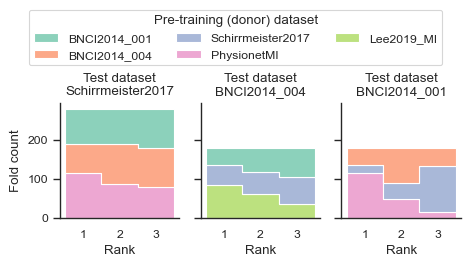

finetune_dataset   rank
BNCI2014_001       1       180.0
                   2       180.0
                   3       180.0
BNCI2014_004       1       180.0
                   2       180.0
                   3       180.0
Schirrmeister2017  1       280.0
                   2       280.0
                   3       280.0
Name: rank_weight, dtype: float64


finetune_dataset   pretrain_dataset   rank
BNCI2014_001       BNCI2014_004       1        45.000000
                                      2        89.500000
                                      3        45.500000
                   PhysionetMI        1       115.000000
                                      2        49.500000
                                      3        15.500000
                   Schirrmeister2017  1        20.000000
                                      2        41.000000
                                      3       119.000000
BNCI2014_004       BNCI2014_001       1        43.000000
                                      2        61.000000
                                      3        76.000000
                   Lee2019_MI         1        83.500000
                                      2        61.500000
                                      3        35.000000
                   Schirrmeister2017  1        53.500000
                                      2      

In [113]:
# rank of pretrain datasets
df = results.copy()
df = df[df.pretrain_dataset.ne(df.finetune_dataset)]
df = df[df.finetune_scheme == 'Scheme 4']
# not our recommandations:
df = df[(df.finetune_dataset != 'BNCI2014_004') | (df.pretrain_dataset != 'PhysionetMI')]
df = df[(df.finetune_dataset != 'BNCI2014_001') | (df.pretrain_dataset != 'Lee2019_MI')]
df = df[(df.finetune_dataset != 'Schirrmeister2017') | (df.pretrain_dataset != 'Lee2019_MI')]

gp = df.groupby(cols_rank_pretrain_dataset, dropna=False).test_acc
df['rank_min'] = gp.rank(method='min', ascending=False)
df['rank_max'] = gp.rank(method='max', ascending=False)
df['rank_weight'] = 1
df['rank'] = 0
rows = []
for _, r in df.iterrows():
    rmin = int(r['rank_min'])
    rmax = int(r['rank_max'])
    for j in range(rmin, rmax + 1):
        r1 = r.copy()
        r1['rank_weight'] = 1 / (rmax - rmin + 1)
        r1['rank'] = int(j)
        rows.append(r1)
df = pd.DataFrame(rows)
n_ranks = int(df['rank'].max())
with sns.axes_style('ticks'):
    g = sns.displot(
        kind='hist', data=df, x="rank", hue="pretrain_dataset", palette='Set2',
        multiple="stack",  #stat='probability',
        element='step',  # 'poly',
        weights='rank_weight',
        # discrete=True,
        binwidth=1,
        binrange=(0.5, n_ranks + 0.5),
        col='finetune_dataset',
        aspect=.8,
        height=2,
        edgecolor='w',
        facet_kws=dict(legend_out=False),
    )
sns.move_legend(
    g,
    title='Pre-training (donor) dataset',
    loc="lower center",
    bbox_to_anchor=(.5, 1),
    ncols=3,
    frameon=True,
)
ticks = range(1, n_ranks + 1) if n_ranks < 10 else range(1, n_ranks + 1, 2)
g.set(xticks=ticks)
# plt.suptitle('Rank distribution of the pre-training datasets')
g.tick_params(bottom=False, top=False)
g.set_xlabels('Rank')
g.set_ylabels(f'Fold count')
g.set_titles(template="Test dataset\n{col_name}")
# g.legend.draw_frame(True)
g.savefig('export/rank_pretrain_datasets_scheme4.pdf', bbox_inches='tight')
plt.show()
print(df.groupby(['finetune_dataset', 'rank']).rank_weight.sum())
df.groupby(['finetune_dataset', 'pretrain_dataset', 'rank']).rank_weight.sum()

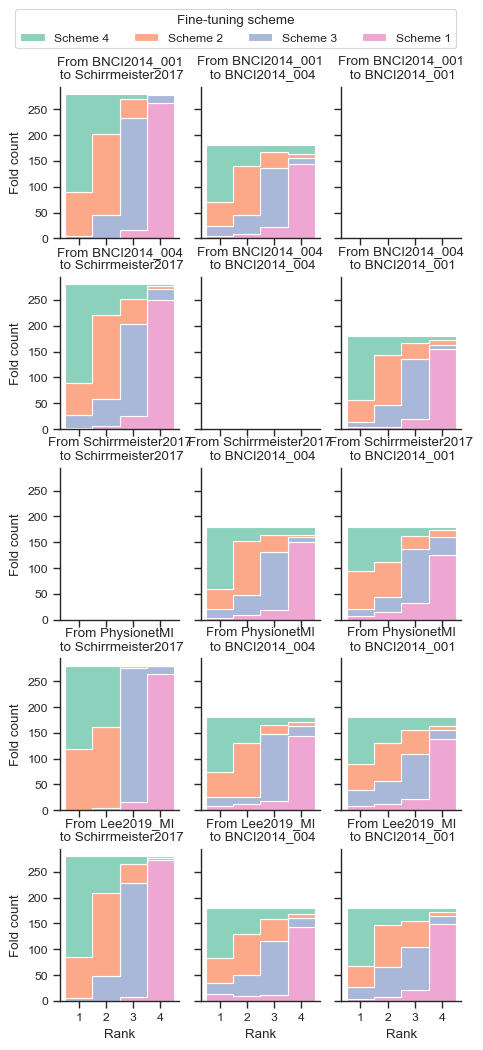

In [114]:
# rank of finetune schemes
df = results.copy()
df = df[df.pretrain_dataset.ne(df.finetune_dataset)]
scheme_order = ['Scheme 4', 'Scheme 2', 'Scheme 3', 'Scheme 1']
# df.finetune_scheme = df.finetune_scheme.astype(pd.CategoricalDtype(categories=scheme_order))

gp = df.groupby(cols_rank_scheme, dropna=False).test_acc
df['rank_min'] = gp.rank(method='min', ascending=False)
df['rank_max'] = gp.rank(method='max', ascending=False)
df['rank_weight'] = 1
df['rank'] = 0
rows = []
for _, r in df.iterrows():
    rmin = int(r['rank_min'])
    rmax = int(r['rank_max'])
    for j in range(rmin, rmax + 1):
        r1 = r.copy()
        r1['rank_weight'] = 1 / (rmax - rmin + 1)
        r1['rank'] = int(j)
        rows.append(r1)
df = pd.DataFrame(rows)
n_ranks = int(df['rank'].max())
with sns.axes_style('ticks'):
    g = sns.displot(
        kind='hist', data=df, x="rank", hue="finetune_scheme", palette='Set2',
        multiple="stack",  #stat='probability',
        element='step',  # 'poly',
        # discrete=True,
        weights='rank_weight',
        binwidth=1,
        binrange=(0.5, n_ranks + 0.5),
        col='finetune_dataset',
        row='pretrain_dataset',
        hue_order=scheme_order,
        aspect=.8,
        height=2,
        edgecolor='w',
        facet_kws=dict(legend_out=False),
    )
sns.move_legend(
    g,
    title='Fine-tuning scheme',
    loc="lower center",
    bbox_to_anchor=(.5, 1),
    ncols=4,
    frameon=True,
)
plt.xticks(range(1, n_ranks + 1) if n_ranks < 10 else range(1, n_ranks + 1, 2))
# plt.suptitle('Rank distribution of the pre-training datasets')
g.set_titles(template="From {row_name}\n to {col_name}")
g.set_xlabels('Rank')
g.set_ylabels(f'Fold count')
g.savefig('export/rank_finetune_schemes.pdf', bbox_inches='tight')
plt.show()

### Barplots

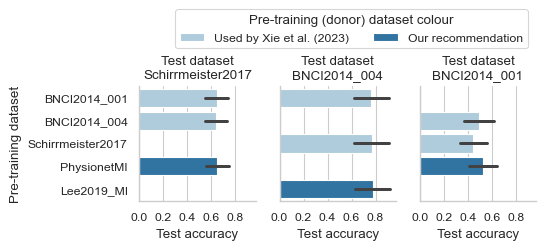

In [115]:
df = results.copy()
df = df[df.pretrain_dataset.ne(df.finetune_dataset)]
df = df[df.finetune_scheme == 'Scheme 4']
# not our recommandations:
df = df[(df.finetune_dataset != 'BNCI2014_004') | (df.pretrain_dataset != 'PhysionetMI')]
df = df[(df.finetune_dataset != 'BNCI2014_001') | (df.pretrain_dataset != 'Lee2019_MI')]
df = df[(df.finetune_dataset != 'Schirrmeister2017') | (df.pretrain_dataset != 'Lee2019_MI')]
legend_label = 'Pre-training (donor) dataset colour'
df[legend_label] = 'Used by Xie et al. (2023)'
df.loc[df.pretrain_dataset.isin(['PhysionetMI', 'Lee2019_MI']), legend_label] = 'Our recommendation'

g = sns.catplot(
    data=df, x='test_acc', y='pretrain_dataset', hue=legend_label, kind='bar', errorbar='sd',
    col='finetune_dataset', dodge=False,
    aspect=1,
    height=2,
    palette='Paired',
    facet_kws=dict(legend_out=False),
)
sns.move_legend(
    g,
    loc="lower center",
    bbox_to_anchor=(.5, 1),
    ncols=2,
    frameon=True,
)
ticks = [0, 0.2, 0.4, 0.6, 0.8]
g.set(xticks=ticks)
g.set_titles(col_template="Test dataset\n{col_name}")
g.set_xlabels('Test accuracy')
g.set_ylabels('Pre-training dataset')
g.savefig('export/barplot_scheme4.pdf', bbox_inches='tight')
plt.show()

## Statistical tests

In [116]:
columns_stats = ['finetune_dataset', 'pretrain_dataset', 'finetune_scheme']
index_stats = [c for c in unique_cols if c not in columns_stats]
df_stats = results.pivot(index=index_stats, columns=columns_stats, values='test_acc', )
df_stats

finetune_dataset                                        Schirrmeister2017  \
pretrain_dataset                                             BNCI2014_001   
finetune_scheme                                                  Scheme 1   
finetune_subject finetune_fold directory    ref_channel                     
1                0             results_v0-1 NaN                   0.42500   
                 1             results_v0-1 NaN                   0.45000   
                 2             results_v0-1 NaN                   0.46875   
                 3             results_v0-1 NaN                   0.46875   
                 4             results_v0-1 NaN                   0.48125   
...                                                                   ...   
14               15            results_v0-1 NaN                   0.49375   
                 16            results_v0-1 NaN                   0.45625   
                 17            results_v0-1 NaN                   0.46875   
                 18            results_v0-1 NaN                   0.49375   
                 19            results_v0-1 NaN                   0.53750   

finetune_dataset                                                           \
pretrain_dataset                                                            
finetune_scheme                                         Scheme 2 Scheme 3   
finetune_subject finetune_fold directory    ref_channel                     
1                0             results_v0-1 NaN          0.47500  0.47500   
                 1             results_v0-1 NaN          0.55625  0.49375   
                 2             results_v0-1 NaN          0.60625  0.51250   
                 3             results_v0-1 NaN          0.56250  0.51250   
                 4             results_v0-1 NaN          0.55000  0.50000   
...                                                          ...      ...   
14               15            results_v0-1 NaN          0.68750  0.51250   
                 16            results_v0-1 NaN          0.72500  0.55000   
                 17            results_v0-1 NaN          0.71250  0.56875   
                 18            results_v0-1 NaN          0.68750  0.54375   
                 19            results_v0-1 NaN          0.67500  0.54375   

finetune_dataset                                                 BNCI2014_004  \
pretrain_dataset                                                 BNCI2014_001   
finetune_scheme                                         Scheme 4     Scheme 1   
finetune_subject finetune_fold directory    ref_channel                         
1                0             results_v0-1 NaN          0.52500     0.615625   
                 1             results_v0-1 NaN          0.60625     0.562500   
                 2             results_v0-1 NaN          0.60000     0.584375   
                 3             results_v0-1 NaN          0.56250     0.609375   
                 4             results_v0-1 NaN          0.53125     0.590625   
...                                                          ...          ...   
14               15            results_v0-1 NaN          0.70625          NaN   
                 16            results_v0-1 NaN          0.66250          NaN   
                 17            results_v0-1 NaN          0.80000          NaN   
                 18            results_v0-1 NaN          0.74375          NaN   
                 19            results_v0-1 NaN          0.73125          NaN   

finetune_dataset                                                             \
pretrain_dataset                                                              
finetune_scheme                                          Scheme 2  Scheme 3   
finetune_subject finetune_fold directory    ref_channel                       
1                0             results_v0-1 NaN          0.718750  0.634375   
                 1             results_v0-1 NaN          0.718750  0.568750  

In [117]:
tests_list = [
    # (finetune_dataset, their pretrain_dataset, my pretrain_dataset suggestion),
    ('BNCI2014_001', 'Schirrmeister2017', 'PhysionetMI'),
    ('BNCI2014_001', 'BNCI2014_004', 'PhysionetMI'),
    ('BNCI2014_004', 'Schirrmeister2017', 'Lee2019_MI'),
    ('BNCI2014_004', 'BNCI2014_001', 'Lee2019_MI'),
    ('Schirrmeister2017', 'BNCI2014_001', 'PhysionetMI'),
    ('Schirrmeister2017', 'BNCI2014_004', 'PhysionetMI'),
]

In [118]:
def test_wilcoxon(df, finetune_dataset, their_pretrain_dataset, my_pretrain_dataset):
    ''' verifies if my pretraining dataset suggestion is better than the one used in Xie2023 
    for a given target finetuning dataset '''
    return wilcoxon(
        x=df[(finetune_dataset, my_pretrain_dataset, 'Scheme 4')].dropna(),  # My suggestion
        y=df[(finetune_dataset, their_pretrain_dataset, 'Scheme 4')].dropna(),  # Used in Xie2023
        alternative='greater',  # H: my suggestion (x) is better than the one used in Xie2023 (y)
    )

In [119]:
test_results = [test_wilcoxon(df_stats, *t) for t in tests_list]
ps = [r.pvalue for r in test_results]
ps_ajusted = false_discovery_control(ps, method='bh')  # Benjamini-Hochberg correction 
finetune_datasets, their_pretrain_datasets, my_pretrain_datasets = zip(*tests_list)
pd.DataFrame({'finetune_dataset': finetune_datasets, 'their_pretrain_dataset': their_pretrain_datasets,
              'my_pretrain_dataset': my_pretrain_datasets, 'pvalue': ps, 'pvalue_ajusted': ps_ajusted})



,finetune_dataset,their_pretrain_dataset,my_pretrain_dataset,pvalue,pvalue_ajusted
0,BNCI2014_001,Schirrmeister2017,PhysionetMI,7.356550e-24,4.413930e-23
1,BNCI2014_001,BNCI2014_004,PhysionetMI,1.083432e-10,3.250297e-10
2,BNCI2014_004,Schirrmeister2017,Lee2019_MI,1.312820e-04,1.969231e-04
3,BNCI2014_004,BNCI2014_001,Lee2019_MI,2.926137e-08,5.852274e-08
4,Schirrmeister2017,BNCI2014_001,PhysionetMI,2.177847e-02,2.177847e-02
5,Schirrmeister2017,BNCI2014_004,PhysionetMI,1.845486e-03,2.214584e-03
